## Feature Matching

- We do not need the exact cut out copy of the image to detect it in the other.

### Import Libraries 

In [36]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 

### Define Custom Display 

In [37]:
def custom_display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  '''
   This line adds a single subplot to the figure. The  method creates a subplot grid with 1 row and 1 column, and the subplot is placed in the first position.
  '''
  ax.imshow(img,cmap='gray')

### Import pictures 

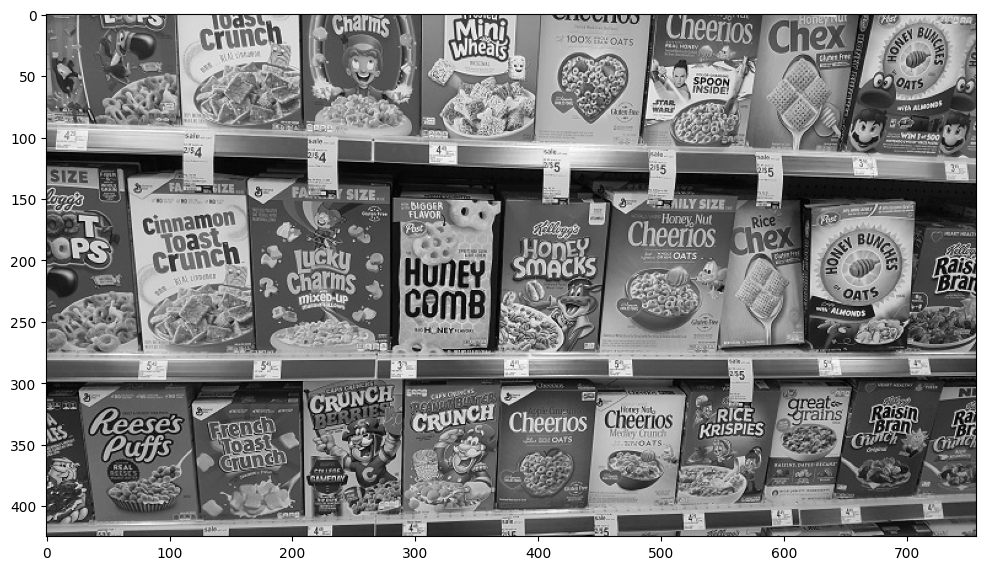

In [38]:
reeses = cv.imread('../data/Files/DATA/reeses_puffs.png',0)
all_cereals = cv.imread('../data/Files/DATA/many_cereals.jpg',0)

custom_display(all_cereals)

## Brute-Force with ORB

In [39]:
ORB = cv.ORB_create()

'''
kp is list of keypoints detected on an image 
des is the description of the point for each image 
'''
kp1,des1 = ORB.detectAndCompute(reeses,None)
kp2,des2 = ORB.detectAndCompute(all_cereals,None)

bruteForce_matcher = cv.BFMatcher(cv.NORM_HAMMING,crossCheck=True)
matches = bruteForce_matcher.match(des1,des2)

# Tuple of Matches object
print(matches)

# distance atribute calrifies how good of a match it was 
# if the distance is less it means more match (i.e difference)
matches = sorted(matches,key=lambda match : match.distance)

reeses_matches = cv.drawMatches(reeses,kp1,all_cereals,kp2,matches[:25],None,flags=2)


(< cv2.DMatch 0x7e0470b865f0>, < cv2.DMatch 0x7e047155d9b0>, < cv2.DMatch 0x7e047c0f78d0>, < cv2.DMatch 0x7e0464b0bbf0>, < cv2.DMatch 0x7e0470b00030>, < cv2.DMatch 0x7e0470b01fd0>, < cv2.DMatch 0x7e0464b2bf30>, < cv2.DMatch 0x7e0464be86d0>, < cv2.DMatch 0x7e0464be8ad0>, < cv2.DMatch 0x7e0464be8bd0>, < cv2.DMatch 0x7e0464be8bb0>, < cv2.DMatch 0x7e0464be85b0>, < cv2.DMatch 0x7e0464be8550>, < cv2.DMatch 0x7e0464be83f0>, < cv2.DMatch 0x7e0464be86f0>, < cv2.DMatch 0x7e0464be8610>, < cv2.DMatch 0x7e0464be83d0>, < cv2.DMatch 0x7e0464be8bf0>, < cv2.DMatch 0x7e0464be89d0>, < cv2.DMatch 0x7e0464be8650>, < cv2.DMatch 0x7e0464be8a50>, < cv2.DMatch 0x7e0464be8a90>, < cv2.DMatch 0x7e0464be8c10>, < cv2.DMatch 0x7e0464be8b70>, < cv2.DMatch 0x7e0464be8350>, < cv2.DMatch 0x7e0464be8b10>, < cv2.DMatch 0x7e0464be8b90>, < cv2.DMatch 0x7e0464be8c30>, < cv2.DMatch 0x7e0464be8c50>, < cv2.DMatch 0x7e0464be8c70>, < cv2.DMatch 0x7e0464be8c90>, < cv2.DMatch 0x7e0464be8cb0>, < cv2.DMatch 0x7e0464be8cd0>, < cv2.DMa

The provided code snippet uses the [`cv.drawMatches`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A17%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition") function from the OpenCV library to visualize the matches between keypoints detected in two images. Let's break down the code and understand its components:

1. **Function Call**:
   ```python
   reeses_matches = cv.drawMatches(reeses, kp1, all_cereals, kp2, matches[:25], None, flags=2)
   ```
   This line calls the [`cv.drawMatches`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A17%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition") function to draw the matches between keypoints in the two images. The function takes several parameters to specify the images, keypoints, matches, and drawing options.

2. **Parameters**:
   - [`reeses`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A32%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition"): The first image, which contains the object of interest (e.g., a box of Reese's Puffs cereal).
   - [`kp1`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A39%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition"): The list of keypoints detected in the first image ([`reeses`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A32%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition")). These keypoints represent distinctive features in the image.
   - [`all_cereals`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A43%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition"): The second image, which contains multiple objects (e.g., a shelf with various cereal boxes).
   - [`kp2`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A55%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition"): The list of keypoints detected in the second image ([`all_cereals`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A43%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition")). These keypoints represent distinctive features in the image.
   - [`matches[:25]`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A59%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition"): A list of the top 25 matches between the keypoints in the two images. The [`matches`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A59%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition") list contains `DMatch` objects, each representing a pair of matched keypoints.
   - [`None`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A72%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition"): This parameter specifies the output image. When set to [`None`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A72%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition"), the function creates a new image to draw the matches.
   - [`flags=2`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A77%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition"): This parameter specifies drawing options. The value [`2`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A83%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition") corresponds to the [`cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A17%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition") flag, which means that only the matched keypoints will be drawn, and single keypoints will not be displayed.

3. **Output**:
   The [`cv.drawMatches`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A17%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition") function returns an image ([`reeses_matches`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A0%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition")) that shows the two input images side by side with lines connecting the matched keypoints. This visual representation helps in understanding how well the keypoints from the two images match and provides a clear way to verify the accuracy of the feature matching process.

### Summary

The code snippet demonstrates how to use the [`cv.drawMatches`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Fdododoyo%2FDocuments%2FML%2F03-computer-vision%2FFeatureMatching.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A17%7D%7D%5D%2C%2276755bff-4238-44cb-bcd4-a33d5933f1ea%22%5D "Go to definition") function to visualize the matches between keypoints detected in two images. By specifying the images, keypoints, and matches, the function creates an output image that highlights the matched keypoints with lines connecting them. This visualization is useful for evaluating the performance of feature detection and matching algorithms in computer vision tasks such as object recognition and image stitching.

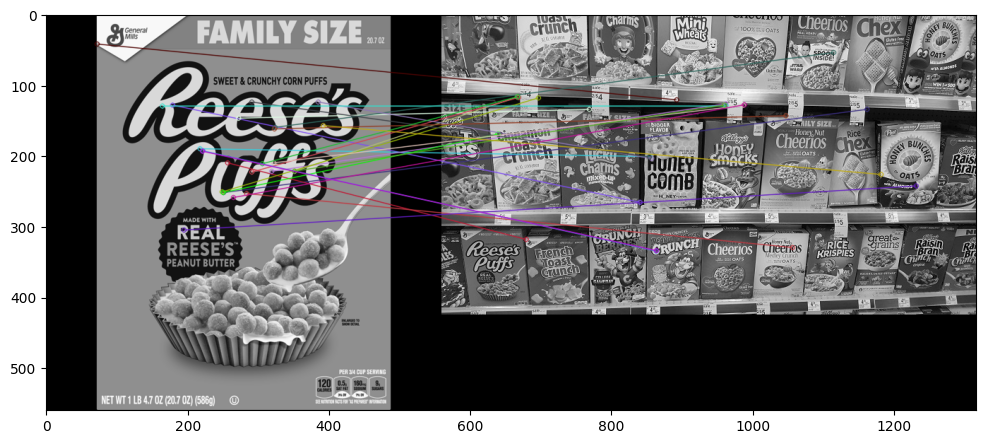

In [40]:
custom_display(reeses_matches)

### SIFT Feature Matching

SIFT (Scale-Invariant Feature Transform) is a widely used algorithm in computer vision for detecting and describing local features in images. It was developed by David Lowe in 1999 and has since become one of the most popular and robust methods for feature detection and matching. SIFT is particularly known for its ability to detect distinctive keypoints that are invariant to scale, rotation, and partially invariant to illumination changes and affine transformations.

### Key Concepts of SIFT

1. **Scale-Invariance**: SIFT can detect features at different scales, making it robust to changes in the size of the object in the image.
2. **Rotation-Invariance**: SIFT features are invariant to rotation, meaning that the algorithm can detect the same features even if the object is rotated.
3. **Distinctive Keypoints**: SIFT identifies keypoints that are highly distinctive, allowing for reliable matching between different images of the same object or scene.

### Steps of the SIFT Algorithm

1. **Scale-Space Extrema Detection**: The algorithm searches for keypoints over multiple scales using a difference-of-Gaussian (DoG) function. This involves creating a series of blurred images (octaves) and subtracting adjacent blurred images to find potential keypoints.

2. **Keypoint Localization**: Potential keypoints are refined to sub-pixel accuracy. Keypoints with low contrast or those that are poorly localized along edges are discarded.

3. **Orientation Assignment**: Each keypoint is assigned one or more orientations based on the local image gradient directions. This step ensures that the keypoints are rotation-invariant.

4. **Keypoint Descriptor**: A 128-dimensional descriptor is computed for each keypoint. This descriptor is based on the local image gradients around the keypoint and is designed to be robust to small changes in illumination and viewpoint.

5. **Keypoint Matching**: The descriptors of keypoints from different images are compared to find matches. Typically, a nearest-neighbor search is used to identify the best matches based on the Euclidean distance between descriptors.



In [41]:
SIFT = cv.SIFT_create()

sift_kp1,sift_des1 = SIFT.detectAndCompute(reeses,None)
sift_kp2,sift_des2 = SIFT.detectAndCompute(all_cereals,None)


SIFT_brute_force_matcher = cv.BFMatcher()
SIFT_matches = SIFT_brute_force_matcher.knnMatch(sift_des1,sift_des2,k=2)

good_match = []

for match1,match2 in SIFT_matches:
  if match1.distance < 0.75*match2.distance:
    good_match.append([match1])

We check if `match1.distance < 0.75 * match2.distance` because we want to ensure that the best match (`match1`) is significantly better than the second-best match (`match2`). This is known as **Lowe's ratio test**, a technique used in feature matching to reduce the number of false matches.

Here's why:

- **`match1.distance`** represents the distance (difference) between a feature descriptor from the first image and its closest match in the second image.
- **`match2.distance`** represents the distance to the second-closest match.

By checking if `match1.distance` is less than 75% of `match2.distance`, we're verifying that the best match is substantially better than the second-best. This means the match is more likely to be correct and not due to noise or repetitive patterns.

If we were to check `match2.distance < 0.75 * match1.distance`, we'd be asking if the second-best match is better than the best match, which doesn't align with the goal of selecting the most reliable matches.

**In summary**, the condition `match1.distance < 0.75 * match2.distance` helps us keep only the matches where the best match is significantly better than the alternative, increasing the accuracy of our feature matching.

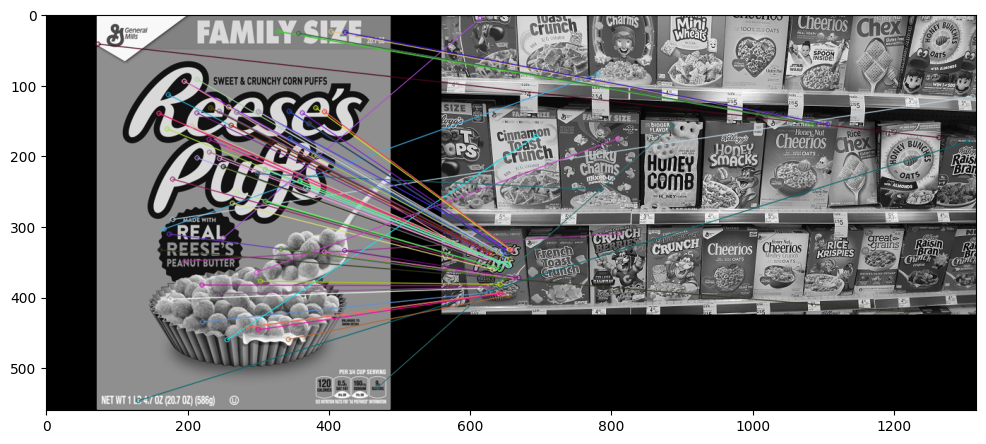

In [42]:
sift_matches = cv.drawMatchesKnn(reeses,sift_kp1,all_cereals,sift_kp2,good_match,None,flags=2)

custom_display(sift_matches)


### Rotated Version

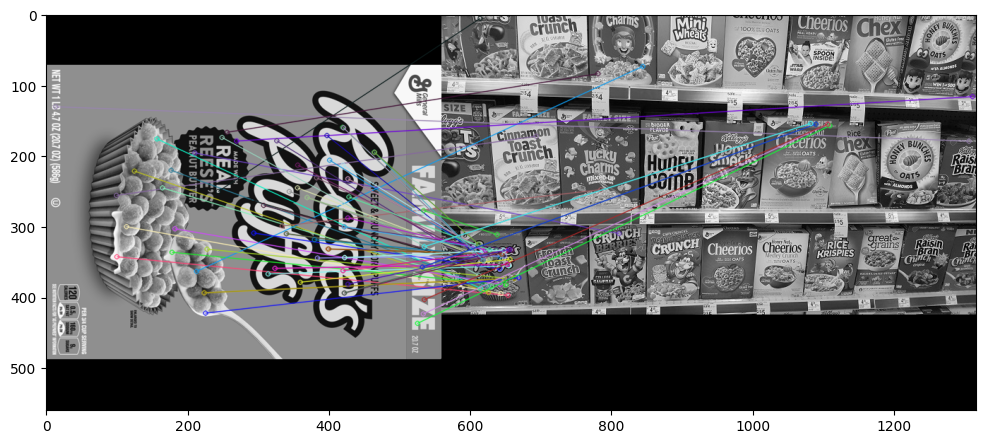

In [43]:
#### Rotated Reeses Puffs
rotated_reeses = cv.imread('../data/Files/DATA/rotated_reeses_puffs.png', 0)

rotated_SIFT = cv.SIFT_create()

rotated_SIFT_kp1, rotated_SIFT_des1 = rotated_SIFT.detectAndCompute(rotated_reeses, None)
rotated_SIFT_kp2, rotated_SIFT_des2 = rotated_SIFT.detectAndCompute(all_cereals, None)

rotated_SIFT_brute_force_matcher = cv.BFMatcher()
rotated_SIFT_matches = rotated_SIFT_brute_force_matcher.knnMatch(rotated_SIFT_des1, rotated_SIFT_des2, k=2)

rotated_good_match = []

for match1, match2 in rotated_SIFT_matches:
  if match1.distance < 0.75*match2.distance:
    rotated_good_match.append([match1])


rotated_sift_matches = cv.drawMatchesKnn(
    rotated_reeses, rotated_SIFT_kp1, all_cereals, rotated_SIFT_kp2, rotated_good_match, None, flags=2)

custom_display(rotated_sift_matches)



> 🧔🏻‍♀️ Greate Success

#### FLANN Based Match

In [44]:
flann = cv.SIFT_create()

flann_kp1_,flann_des1 = flann.detectAndCompute(reeses,None)
flann_kp2_,flann_des2 = flann.detectAndCompute(all_cereals,None)

In [45]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)

search_params = dict(checks=50)

flann_matcher = cv.FlannBasedMatcher(indexParams=index_params,searchParams=search_params)

flann_matches = flann_matcher.knnMatch(flann_des1,flann_des2,k=2)


#### Filter good matches 

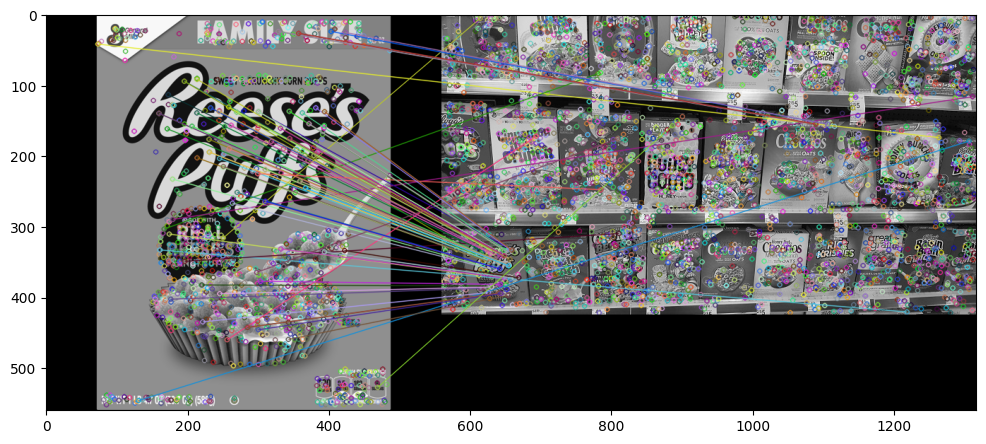

In [46]:
good_flann_match = []

for match1, match2 in flann_matches:
  if match1.distance < 0.75*match2.distance:
    good_flann_match.append([match1])

good_matches = cv.drawMatchesKnn(reeses,flann_kp1_,all_cereals,flann_kp2_,good_flann_match,None,flags=0)

custom_display(good_matches)

### Rotated FLANN Based Matching 

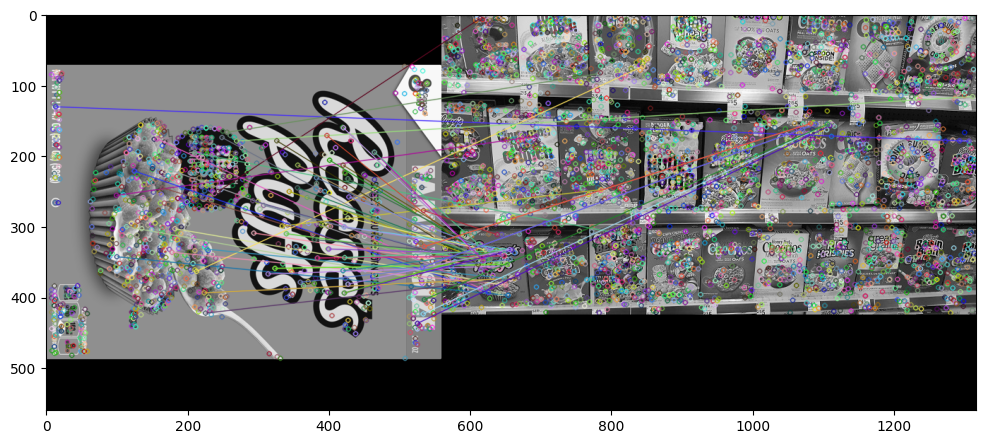

In [47]:
rotated_flann = cv.SIFT_create()

rotated_flann_kp1_, rotated_flann_des1 = rotated_flann.detectAndCompute(rotated_reeses, None)
rotated_flann_kp2_, rotated_flann_des2 = rotated_flann.detectAndCompute(all_cereals,None)

index_params = dict(algorithm=0, trees=5)

search_params = dict(checks=50)

rotated_flann_matcher = cv.FlannBasedMatcher(
    indexParams=index_params, searchParams=search_params)

rotated_flann_matches = rotated_flann_matcher.knnMatch(rotated_flann_des1, rotated_flann_des2, k=2)

good_rotated_flann_match = []

for match1, match2 in rotated_flann_matches:
  if match1.distance < 0.75*match2.distance:
    good_rotated_flann_match.append([match1])

rotated_good_matches = cv.drawMatchesKnn(
    rotated_reeses, rotated_flann_kp1_, all_cereals, rotated_flann_kp2_, good_rotated_flann_match, None, flags=0)

custom_display(rotated_good_matches)

#### Draw Matching Using Masks

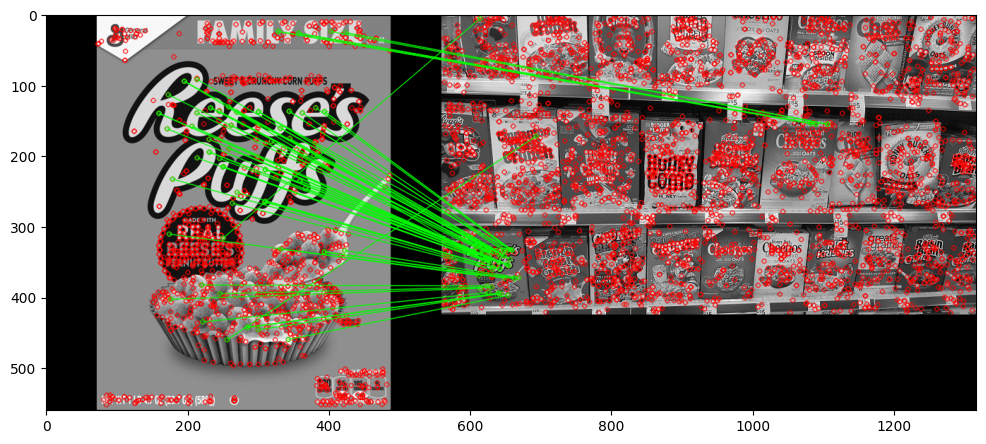

In [51]:
matchesMask = [[0,0] for i in range(len(flann_matches))]

for i, (match1,match2) in enumerate(flann_matches):
  if match1.distance < 0.7*match2.distance:
    matchesMask[i] = [1,0]

drawingParams = dict(matchColor=(0,255,0),singlePointColor=(255,0,0),matchesMask=matchesMask,flags=0)

mask_flann_matches = cv.drawMatchesKnn(
    reeses, flann_kp1_, all_cereals, flann_kp2_, flann_matches, None, **drawingParams)

custom_display(mask_flann_matches)